Зотов Роман Алексеевич 6132
<br>Тема лабораторной работы: линейная регрессия

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from itertools import combinations
from sklearn.feature_selection import SelectPercentile, mutual_info_classif, RFECV
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Задание 1

Считать в pandas.DataFrame любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [2]:
heros = pd.read_csv(f'../lab4/Constants.Heroes.csv')
heros

,Unnamed: 0,id,name,primary_attr,attack_type,roles,img,icon,base_health,base_health_regen,...,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision,localized_name
0,0,1,npc_dota_hero_antimage,agi,Melee,"['Carry', 'Escape', 'Nuker']",/apps/dota2/images/dota_react/heroes/antimage....,/apps/dota2/images/dota_react/heroes/icons/ant...,120,1.00,...,1.4,100,0.30,310,NaN,True,2,1800,800,Anti-Mage
1,1,2,npc_dota_hero_axe,str,Melee,"['Initiator', 'Durable', 'Disabler', 'Carry']",/apps/dota2/images/dota_react/heroes/axe.png?,/apps/dota2/images/dota_react/heroes/icons/axe...,120,2.50,...,1.7,100,0.40,315,NaN,True,2,1800,800,Axe
2,2,3,npc_dota_hero_bane,all,Ranged,"['Support', 'Disabler', 'Nuker', 'Durable']",/apps/dota2/images/dota_react/heroes/bane.png?,/apps/dota2/images/dota_react/heroes/icons/ban...,120,0.25,...,1.7,100,0.30,305,NaN,True,4,1800,1200,Bane
3,3,4,npc_dota_hero_bloodseeker,agi,Melee,"['Carry', 'Disabler', 'Nuker', 'Initiator']",/apps/dota2/images/dota_react/heroes/bloodseek...,/apps/dota2/images/dota_react/heroes/icons/blo...,120,0.25,...,1.7,100,0.43,285,NaN,True,2,1800,800,Bloodseeker
4,4,5,npc_dota_hero_crystal_maiden,int,Ranged,"['Support', 'Disabler', 'Nuker']",/apps/dota2/images/dota_react/heroes/crystal_m...,/apps/dota2/images/dota_react/heroes/icons/cry...,120,0.25,...,1.7,100,0.45,280,NaN,True,2,1800,800,Crystal Maiden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,121,135,npc_dota_hero_dawnbreaker,str,Melee,"['Carry', 'Durable']",/apps/dota2/images/dota_react/heroes/dawnbreak...,/apps/dota2/images/dota_react/heroes/icons/daw...,120,0.50,...,1.7,100,0.46,300,0.6,True,2,1800,800,Dawnbreaker
122,122,136,npc_dota_hero_marci,all,Melee,"['Support', 'Carry', 'Initiator', 'Disabler', ...",/apps/dota2/images/dota_react/heroes/marci.png?,/apps/dota2/images/dota_react/heroes/icons/mar...,120,0.25,...,1.7,100,0.30,315,0.9,True,2,1800,800,Marci
123,123,137,npc_dota_hero_primal_beast,str,Melee,"['Initiator', 'Durable', 'Disabler']",/apps/dota2/images/dota_react/heroes/primal_be...,/apps/dota2/images/dota_react/heroes/icons/pri...,120,0.25,...,1.8,100,0.60,305,0.6,True,2,1800,800,Primal Beast
124,124,138,npc_dota_hero_muerta,int,Ranged,"['Carry', 'Nuker', 'Disabler']",/apps/dota2/images/dota_react/heroes/muerta.png?,/apps/dota2/images/dota_react/heroes/icons/mue...,120,0.25,...,1.7,115,0.35,295,0.7,True,2,1800,800,Muerta


In [ ]:
import ast
heroes_df = heros[['id','roles']]
heroes_df['roles'] = heroes_df['roles'].apply(ast.literal_eval)
heroes_df

C:\Users\Roma\AppData\Local\Temp\ipykernel_1764\2003197717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heroes_df['roles'] = heroes_df['roles'].apply(ast.literal_eval)


,id,roles
0,1,"[Carry, Escape, Nuker]"
1,2,"[Initiator, Durable, Disabler, Carry]"
2,3,"[Support, Disabler, Nuker, Durable]"
3,4,"[Carry, Disabler, Nuker, Initiator]"
4,5,"[Support, Disabler, Nuker]"
...,...,...
121,135,"[Carry, Durable]"
122,136,"[Support, Carry, Initiator, Disabler, Escape]"
123,137,"[Initiator, Durable, Disabler]"
124,138,"[Carry, Nuker, Disabler]"


In [ ]:
heroes_df[heroes_df['id']==1]['roles'][0]

'Carry'

In [54]:
print(True if 'Carry' in heroes_df[heroes_df['id']==1]['roles'][0] else False)

True


In [30]:
roles = set([j for i in heroes_df['roles'] for j in i])
roles

{'Carry',
 'Disabler',
 'Durable',
 'Escape',
 'Initiator',
 'Nuker',
 'Pusher',
 'Support'}

In [3]:
df = pd.concat(pd.read_csv(f'../lab2/20250{i}/players.csv') for i in range(1,5))
df

C:\Users\Roma\AppData\Local\Temp\ipykernel_1764\3887877372.py:1: DtypeWarning: Columns (148) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(pd.read_csv(f'../lab2/20250{i}/players.csv') for i in range(1,5))
C:\Users\Roma\AppData\Local\Temp\ipykernel_1764\3887877372.py:1: DtypeWarning: Columns (51,52,128,150) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(pd.read_csv(f'../lab2/20250{i}/players.csv') for i in range(1,5))


,player_slot,obs_placed,sen_placed,creeps_stacked,camps_stacked,rune_pickups,firstblood_claimed,teamfight_participation,towers_killed,roshans_killed,...,purchase_rapier,match_id,leagueid,performance_others,additional_units,repicked,hero_variant,neutral_tokens_log,neutral_item_history,item_neutral2
0,0,0.0,0.0,4.0,2.0,1.0,0.0,0.863636,0.0,0.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,"[{'time': 433, 'key': 'Tier1Token'}, {'time': ...",NaN,NaN
1,1,2.0,0.0,3.0,1.0,5.0,0.0,0.636364,3.0,0.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,"[{'time': 1918, 'key': 'Tier3Token'}]",NaN,NaN
2,2,0.0,0.0,6.0,2.0,7.0,0.0,0.227273,2.0,1.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,"[{'time': 473, 'key': 'Tier1Token'}, {'time': ...",NaN,NaN
3,3,9.0,12.0,66.0,12.0,1.0,0.0,0.227273,0.0,0.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,[],NaN,NaN
4,4,4.0,5.0,43.0,7.0,3.0,0.0,0.818182,1.0,0.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,128,3.0,2.0,8.0,3.0,0.0,0.0,0.400000,0.0,0.0,...,NaN,8245079060,17211,NaN,NaN,NaN,3.0,[],"[{'time': 488, 'item_neutral': 'mana_draught',...",1586.0
6416,129,0.0,0.0,0.0,0.0,3.0,0.0,0.266667,0.0,0.0,...,NaN,8245079060,17211,NaN,NaN,NaN,1.0,[],"[{'time': 450, 'item_neutral': 'polliwog_charm...",1577.0
6417,130,1.0,1.0,3.0,1.0,2.0,0.0,0.333333,1.0,0.0,...,NaN,8245079060,17211,NaN,NaN,NaN,2.0,[],"[{'time': 458, 'item_neutral': 'spark_of_coura...",1594.0
6418,131,2.0,0.0,0.0,0.0,11.0,0.0,0.866667,2.0,0.0,...,NaN,8245079060,17211,NaN,NaN,NaN,1.0,[],"[{'time': 461, 'item_neutral': 'trusty_shovel'...",1583.0


# Задание 2

Датасет и подготовка данных, этап 1:
<br> используем тот же датасет, как и в 4
<br> только переделаем его под вид, 
<br> героев, характеристик персонажей и т.д.
<br> таргетом будет винрейт

In [76]:
def extract_teams(group):
    radiant = group[group['player_slot'] <= 128].sort_values('player_slot')['hero_id'].tolist()
    dire    = group[group['player_slot'] > 128].sort_values('player_slot')['hero_id'].tolist()
    return pd.Series({
        'radiant_heroes': radiant,
        'dire_heroes': dire,
        'radiant_win': group['radiant_win'].iloc[0]
    })

def synergy(line, pic = 'hero_id'):
    wr_radiant, wr_dire = 0.0, 0.0
    
    # Для Radiant
    for hero1, hero2 in combinations(sorted(line[pic]), 2):
        # Исправлено: безопасное получение винрейта (если пара отсутствует, используется 0.5)
        pair_data = winrate_df[(winrate_df['hero1'] == hero1) & (winrate_df['hero2'] == hero2)]
        wr = pair_data['winrate'].values[0] if not pair_data.empty else 0.5
        wr_radiant += wr
    
    # Для Dire
    # for hero1, hero2 in combinations(sorted(line['dire_heroes']), 2):
    #     pair_data = winrate_df[(winrate_df['hero1'] == hero1) & (winrate_df['hero2'] == hero2)]
    #     wr = pair_data['winrate'].values[0] if not pair_data.empty else 0.5
    #     wr_dire += wr
    
    return pd.Series({'wr': wr_radiant})


def hero_melee(line, pic = 'hero_id'):
    melee_radiant, melee_dire = 0, 0
    agi_radiant, int_radiant, str_radiant =0,0,0
    #agi_dire, int_dire, str_dire =0,0,0
    for hero in line[pic]:
        hero_data = heros[heros['id'] == hero].iloc[0]
        melee_radiant += 1 if hero_data['attack_type'] == 'Melee' else 0
        agi_radiant += 1 if hero_data['primary_attr'] == 'agi' else 0
        int_radiant += 1 if hero_data['primary_attr'] == 'int' else 0
        str_radiant += 1 if hero_data['primary_attr'] == 'str' else 0

    # for hero in line['dire_heroes']:
    #     hero_data = heros[heros['id'] == hero].iloc[0]

    #     melee_dire += 1 if hero_data['attack_type'] == 'Melee' else 0
    #     agi_dire += 1 if hero_data['primary_attr'] == 'agi' else 0
    #     int_dire += 1 if hero_data['primary_attr'] == 'int' else 0
    #     str_dire += 1 if hero_data['primary_attr'] == 'str' else 0

    return pd.Series({'melee': melee_radiant, 
                      'agi': agi_radiant,
                      'int': int_radiant, 
                      'str': str_radiant,
                    #   'melee_dire': melee_dire, 
                    #   'agi_dire': agi_dire,
                    #   'int_dire': int_dire, 
                    #   'str_dire': str_dire,
                      })

def hero_roles(line):
    carry, disabler, durable, escape, initiator, nuker, pusher, support = 0,0,0,0,0,0,0,0
    for hero in line['hero_id']:
        hero_data = heroes_df[heroes_df['id'] == hero].iloc[0]
        #print(True if 'Support' in hero_data['roles'] else False)
        carry += 1 if 'Carry' in hero_data['roles'] else 0
        disabler += 1 if 'Disabler' in hero_data['roles'] else 0
        durable += 1 if 'Durable' in hero_data['roles'] else 0
        escape += 1 if 'Escape' in hero_data['roles'] else 0
        initiator += 1 if 'Initiator' in hero_data['roles'] else 0
        nuker += 1 if 'Nuker' in hero_data['roles'] else 0 
        pusher += 1 if 'Pusher' in hero_data['roles'] else 0
        support += 1 if 'Support' in hero_data['roles'] else 0
    
    return pd.Series({
        'carry': carry, 
        'disabler': disabler, 
        'durable': durable, 
        'escape': escape, 
        'initiator': initiator, 
        'nuker': nuker, 
        'pusher': pusher, 
        'support': support,
    })

Нормализовать численные данные.

In [12]:
data = df[['match_id', 'hero_id', 'player_slot', 'radiant_win']].copy()
data['team'] = data['player_slot'].apply(lambda x: 'radiant' if x < 128 else 'dire')
data

,match_id,hero_id,player_slot,radiant_win,team
0,8107483721,2,0,False,radiant
1,8107483721,11,1,False,radiant
2,8107483721,95,2,False,radiant
3,8107483721,37,3,False,radiant
4,8107483721,101,4,False,radiant
...,...,...,...,...,...
6415,8245079060,9,128,True,dire
6416,8245079060,29,129,True,dire
6417,8245079060,109,130,True,dire
6418,8245079060,7,131,True,dire


In [13]:
grouped = data.groupby(['match_id', 'team'])['hero_id'].apply(list).reset_index()
grouped

,match_id,team,hero_id
0,8107483721,dire,"[102, 36, 46, 22, 26]"
1,8107483721,radiant,"[2, 11, 95, 37, 101]"
2,8107511870,dire,"[41, 74, 101, 2, 79]"
3,8107511870,radiant,"[11, 57, 86, 70, 97]"
4,8107808159,dire,"[56, 58, 55, 13, 100]"
...,...,...,...
16687,8245032799,radiant,"[137, 97, 22, 128, 106]"
16688,8245056252,dire,"[129, 46, 17, 105, 75]"
16689,8245056252,radiant,"[77, 79, 44, 25, 26]"
16690,8245079060,dire,"[9, 29, 109, 7, 85]"


In [14]:
results = []
for _, row in grouped.iterrows():
    match_id = row['match_id']
    team = row['team']
    heroes = row['hero_id']
    # Получаем результат матча для команды
    radiant_win = df.loc[df['match_id'] == match_id, 'radiant_win'].values[0]
    win = 1 if (team == 'radiant' and radiant_win) or (team == 'dire' and not radiant_win) else 0
    
    # Генерируем уникальные пары героев (с сортировкой)
    for hero1, hero2 in combinations(sorted(heroes), 2):
        results.append((hero1, hero2, win, 1))

results_df = pd.DataFrame(results, columns=['hero1', 'hero2', 'win', 'total'])
results_df

,hero1,hero2,win,total
0,22,26,1,1
1,22,36,1,1
2,22,46,1,1
3,22,102,1,1
4,26,36,1,1
...,...,...,...,...
166915,54,69,1,1
166916,54,131,1,1
166917,68,69,1,1
166918,68,131,1,1


In [15]:
winrate_df = results_df.groupby(['hero1', 'hero2']).agg(
    total_matches=('total', 'sum'),
    wins=('win', 'sum')
).reset_index()

winrate_df['winrate'] = winrate_df['wins'] / winrate_df['total_matches']

# Сортируем по убыванию винрейта
winrate_df = winrate_df.sort_values(by='winrate', ascending=False)

winrate_df

,hero1,hero2,total_matches,wins,winrate
3641,37,89,4,4,1.0
5402,61,131,6,6,1.0
5535,64,66,1,1,1.0
1743,16,112,2,2,1.0
1756,16,137,5,5,1.0
...,...,...,...,...,...
4176,44,56,2,0,0.0
2448,23,98,4,0,0.0
6359,79,111,1,0,0.0
4635,50,58,4,0,0.0


In [ ]:
matches = grouped.copy()
matches['wr'] = matches.apply(synergy, axis=1)
matches[['melee', 
         'agi',
         'int',
         'str',]] = matches.apply(hero_melee, axis=1)

matches[['carry', 
        'disabler', 
        'durable', 
        'escape', 
        'initiator', 
        'nuker', 
        'pusher', 
        'support',]] = matches.apply(hero_roles, axis=1)

In [78]:
matches

,match_id,team,hero_id,wr,melee,agi,int,str,carry,disabler,durable,escape,initiator,nuker,pusher,support
0,8107483721,dire,"[102, 36, 46, 22, 26]",4.762175,1,1,3,0,4,2,2,1,1,3,0,2
1,8107483721,radiant,"[2, 11, 95, 37, 101]",4.551676,1,2,2,1,3,4,2,0,2,2,1,2
2,8107511870,dire,"[41, 74, 101, 2, 79]",5.923563,2,1,2,1,3,5,2,2,3,3,1,2
3,8107511870,radiant,"[11, 57, 86, 70, 97]",4.609899,3,2,1,1,2,3,2,1,1,4,0,2
4,8107808159,dire,"[56, 58, 55, 13, 100]",6.164294,2,1,2,1,1,4,1,3,3,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16687,8245032799,radiant,"[137, 97, 22, 128, 106]",4.668864,3,1,1,1,2,4,1,3,3,4,0,1
16688,8245056252,dire,"[129, 46, 17, 105, 75]",4.858105,1,1,2,1,4,4,1,2,3,3,0,1
16689,8245056252,radiant,"[77, 79, 44, 25, 26]",4.790199,2,1,3,0,3,3,1,2,2,3,1,3
16690,8245079060,dire,"[9, 29, 109, 7, 85]",4.748726,4,1,0,3,3,4,2,1,2,5,1,3


In [87]:

team_column = 'team'

encoder = OneHotEncoder(drop='first',sparse_output=False, dtype=int)

team_data = encoder.fit_transform(matches[[team_column]])

team_df = pd.DataFrame(
    team_data,
    columns=encoder.get_feature_names_out([team_column])
)
team_df

,team_radiant
0,0
1,1
2,0
3,1
4,0
...,...
16687,1
16688,0
16689,1
16690,0


In [80]:
# Собираем всех уникальных героев
all_heroes = sorted(
    set(matches['hero_id'].explode().unique())
)

# Инициализируем бинаризатор
mlb = MultiLabelBinarizer(classes=all_heroes)

# Преобразуем списки героев в бинарные матрицы
X_radiant = mlb.fit_transform(matches['hero_id'])

# Создаем DataFrame с признаками героев
hero_columns = [f"hero_{h}" for h in all_heroes]
df_hero = pd.DataFrame(X_radiant, columns=[f"{c}" for c in hero_columns])
df_hero

,hero_1,hero_2,hero_3,hero_4,hero_5,hero_6,hero_7,hero_8,hero_9,hero_10,...,hero_123,hero_126,hero_128,hero_129,hero_131,hero_135,hero_136,hero_137,hero_138,hero_145
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16687,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
16688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
16689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16690,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:

scaler = StandardScaler()
 
wr_scaled = scaler.fit_transform(matches[['wr',	'melee', 'agi',	'int', 'str', 'carry', 'disabler', 'durable', 'escape', 'initiator', 'nuker', 'pusher', 'support']])

# Создаем DataFrame для масштабированных признаков
df_wr = pd.DataFrame(wr_scaled, columns=['wr_scaled', 'melee_scaled',
                                         'agi_scaled', 'int_scaled',
                                         'str_scaled','carry_scaled','disabler_scaled',
                                         'durable_scaled','escape_scaled','initiator_scaled',
                                         'nuker_scaled','pusher_scaled','support_scaled'])

numeric_features = ['melee_scaled',
                    'agi_scaled', 'int_scaled',
                    'str_scaled','carry_scaled','disabler_scaled',
                    'durable_scaled','escape_scaled','initiator_scaled',
                    'nuker_scaled','pusher_scaled','support_scaled']

# Объединяем все признаки
final_df = pd.concat([df_hero,team_df, df_wr], axis=1)
final_df = final_df.rename(columns={'wr_scaled':'target'})
final_df

,hero_1,hero_2,hero_3,hero_4,hero_5,hero_6,hero_7,hero_8,hero_9,hero_10,...,int_scaled,str_scaled,carry_scaled,disabler_scaled,durable_scaled,escape_scaled,initiator_scaled,nuker_scaled,pusher_scaled,support_scaled
0,0,0,0,0,0,0,0,0,0,0,...,1.902239,-1.634604,1.307739,-1.980856,0.120176,-0.886804,-1.474082,-0.887760,-1.121849,0.335196
1,0,1,0,0,0,0,0,0,0,0,...,0.714442,-0.473943,0.160908,0.229482,0.120176,-1.829281,-0.486549,-1.997593,0.076762,0.335196
2,0,1,0,0,0,0,0,0,0,0,...,0.714442,-0.473943,0.160908,1.334651,0.120176,0.055672,0.500984,-0.887760,0.076762,0.335196
3,0,0,0,0,0,0,0,0,0,0,...,-0.473354,-0.473943,-0.985923,-0.875687,0.120176,-0.886804,-1.474082,0.222073,-1.121849,0.335196
4,0,0,0,0,0,0,0,0,0,0,...,0.714442,-0.473943,-2.132754,0.229482,-0.976587,0.998149,0.500984,-1.997593,1.275374,-0.801786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16687,0,0,0,0,0,0,0,0,0,0,...,-0.473354,-0.473943,-0.985923,0.229482,-0.976587,0.998149,0.500984,0.222073,-1.121849,-0.801786
16688,0,0,0,0,0,0,0,0,0,0,...,0.714442,-0.473943,1.307739,0.229482,-0.976587,0.055672,0.500984,-0.887760,-1.121849,-0.801786
16689,0,0,0,0,0,0,0,0,0,0,...,1.902239,-1.634604,0.160908,-0.875687,-0.976587,0.055672,-0.486549,-0.887760,0.076762,1.472178
16690,0,0,0,0,0,0,1,0,1,0,...,-1.661150,1.847378,0.160908,0.229482,0.120176,-0.886804,-0.486549,1.331906,0.076762,1.472178


In [106]:
print(f'минимум для таргета: {min(final_df['target'])}')
print(f'максимум для таргета: {max(final_df['target'])}')

минимум для таргета: -7.114996926684789
максимум для таргета: 6.315914965078815


Визуализировать heatmap-матрицу кореллированности признаков.

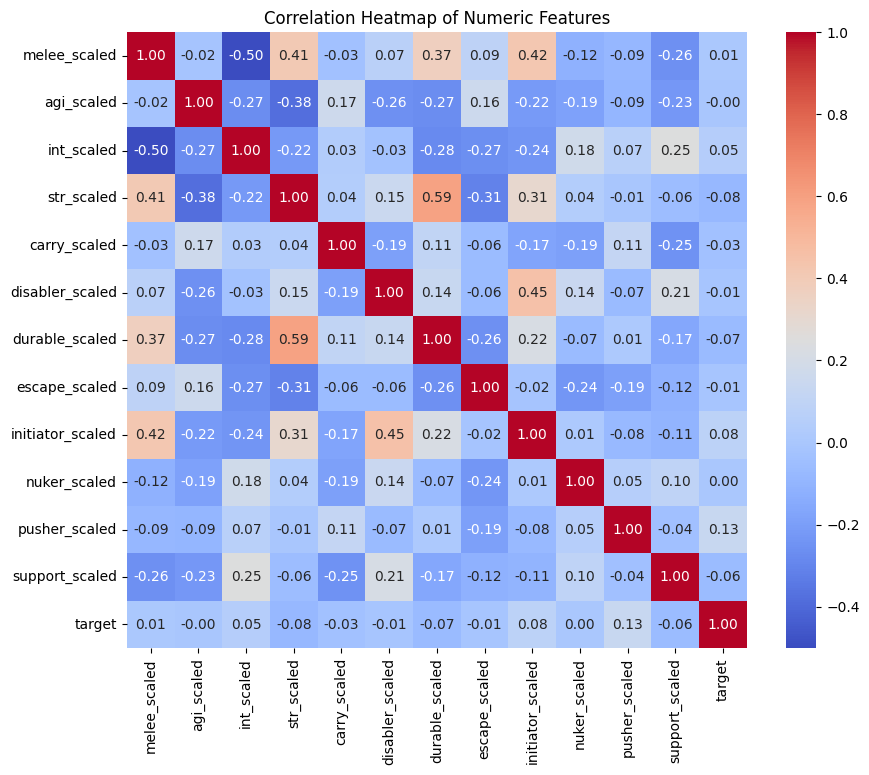

In [93]:
plt.figure(figsize=(10, 8))
corr_matrix = final_df[numeric_features+['target']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.savefig('correlation_heatmap.png')
plt.show()
plt.close()


Визуализировать взаимосвязь между target-переменной и каждым из признаком (с использованием srs.pairplot или pandas.plotting.scatter_matrix). Лучше всего построить диаграмму попарного распределения между таргетом и каждым из признаков отдельно (пример с sns.FacetGrid в лекции).


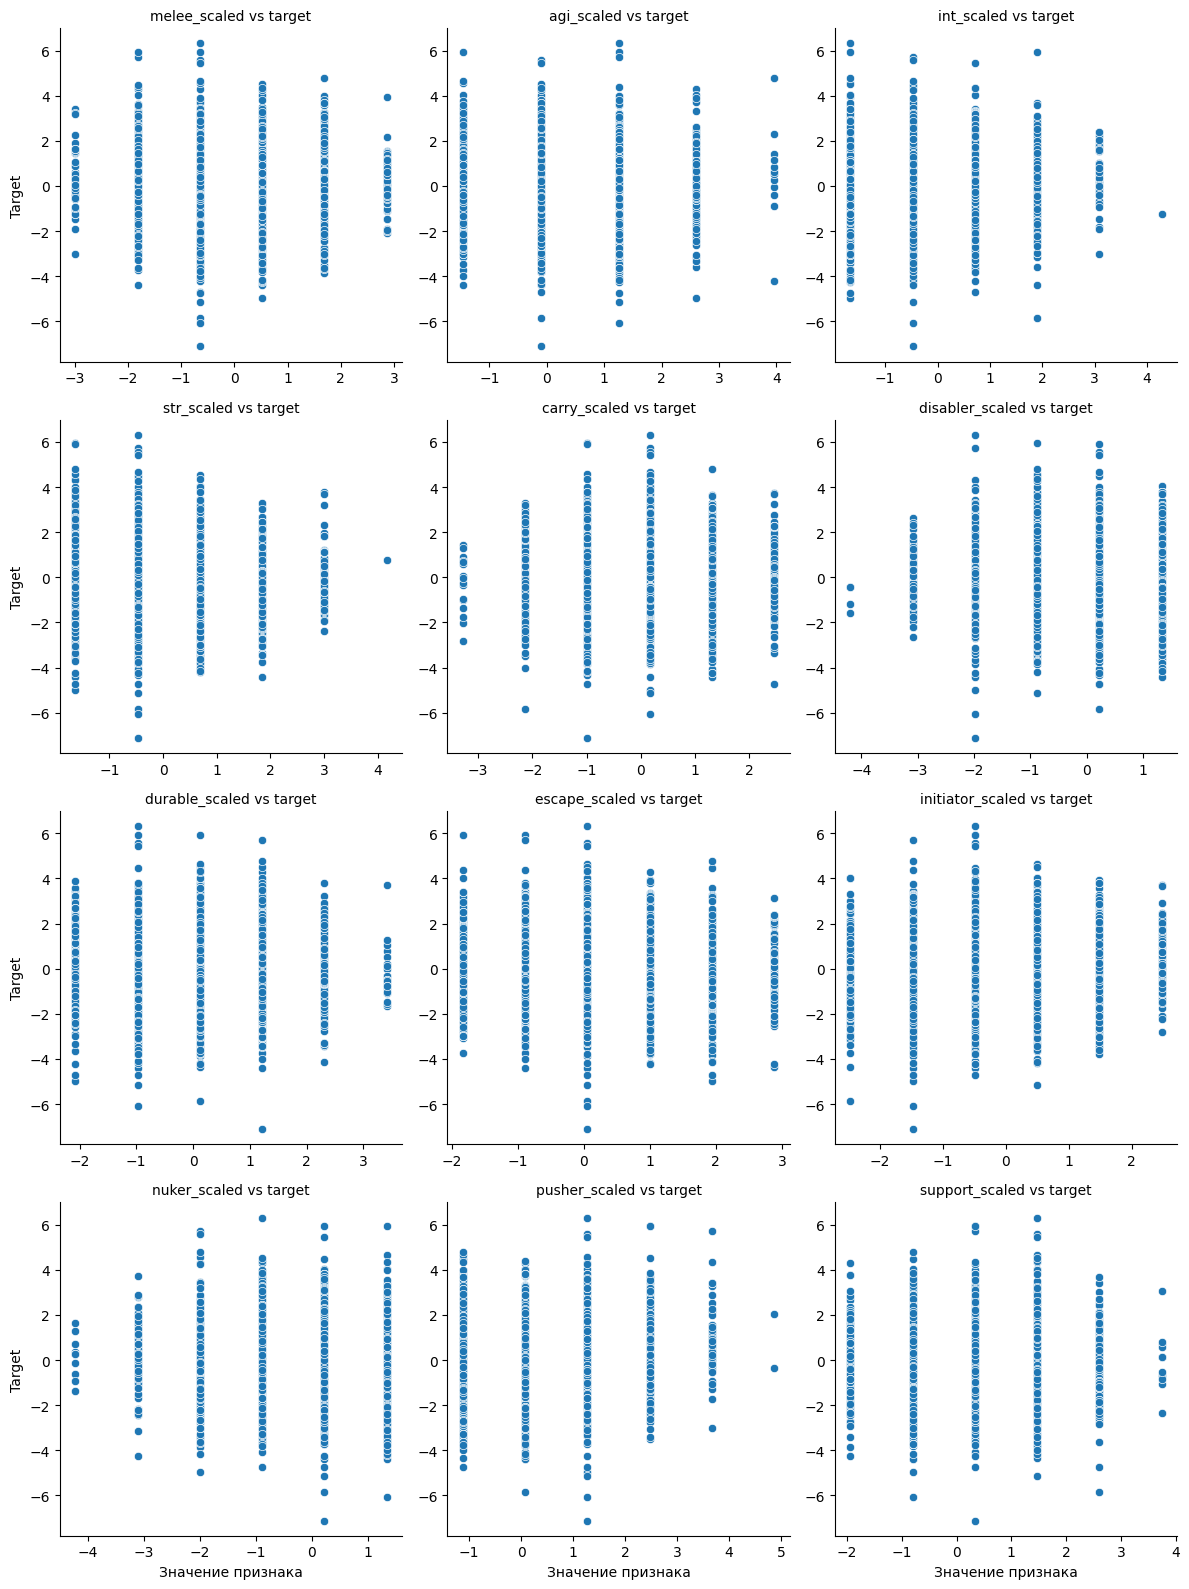

In [94]:
df_melted = pd.melt(final_df, id_vars=['target'], value_vars=numeric_features, var_name='feature', value_name='value')
g = sns.FacetGrid(df_melted, col='feature', col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.scatterplot, 'value', 'target')
g.set_titles('{col_name} vs target')
g.set_xlabels('Значение признака')
g.set_ylabels('Target')
plt.savefig('facetgrid_numeric.png')
plt.show()
plt.close()

In [ ]:
categorical_features = [i for i in final_df.columns.to_list() if i not in numeric_features+['target']]
categorical_features

['hero_1',
 'hero_2',
 'hero_3',
 'hero_4',
 'hero_5',
 'hero_6',
 'hero_7',
 'hero_8',
 'hero_9',
 'hero_10',
 'hero_11',
 'hero_12',
 'hero_13',
 'hero_14',
 'hero_15',
 'hero_16',
 'hero_17',
 'hero_18',
 'hero_19',
 'hero_20',
 'hero_21',
 'hero_22',
 'hero_23',
 'hero_25',
 'hero_26',
 'hero_27',
 'hero_28',
 'hero_29',
 'hero_30',
 'hero_31',
 'hero_32',
 'hero_33',
 'hero_34',
 'hero_35',
 'hero_36',
 'hero_37',
 'hero_38',
 'hero_39',
 'hero_40',
 'hero_41',
 'hero_42',
 'hero_43',
 'hero_44',
 'hero_45',
 'hero_46',
 'hero_47',
 'hero_48',
 'hero_49',
 'hero_50',
 'hero_51',
 'hero_52',
 'hero_53',
 'hero_54',
 'hero_55',
 'hero_56',
 'hero_57',
 'hero_58',
 'hero_59',
 'hero_60',
 'hero_61',
 'hero_62',
 'hero_63',
 'hero_64',
 'hero_65',
 'hero_66',
 'hero_67',
 'hero_68',
 'hero_69',
 'hero_70',
 'hero_71',
 'hero_72',
 'hero_73',
 'hero_74',
 'hero_75',
 'hero_76',
 'hero_77',
 'hero_78',
 'hero_79',
 'hero_80',
 'hero_81',
 'hero_82',
 'hero_83',
 'hero_84',
 'hero_85',
 

Разбить выборку на обучающую и тестовую.


In [97]:
X = final_df.drop('target', axis=1)
y = final_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
X_train_num, X_test_num = X_train[numeric_features], X_test[numeric_features]
X_train_cat, X_test_cat = X_train[categorical_features], X_test[categorical_features]
feature_names_num = X_train_num.columns

# Задание 3-4

Обучить модель линейной регрессии LinearRegression.
<br>Вывести метрики MSE, MAE и R2 на тестовом наборе.
<br>Вывести model.coef_ и model.intercept_.
<br>Построить график (barh) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).
<br>С использованием GridSearchCV осуществить подбор параметров регуляризации (alpha для Ridge и LASSO, alpha и l1_ratio для Elastic Net)
<br>Вывести значения гиперпараметров, коэффициенты регрессии (model.coef_ и model.intercept_) и значения метрик на тестовом наборе для наилучшей модели (MSE, MAE и R2).
<br>Построить график (barh) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

In [99]:
def print_metrics_and_coeffs(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{model_name} Results:")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    return y_pred

def plot_feature_importance(coefs, feature_names, model_name):
    plt.figure(figsize=(10, 6))
    sorted_idx = np.argsort(np.abs(coefs))[::-1]  # Sort by absolute value, descending
    plt.barh(range(len(coefs)), coefs[sorted_idx], align='center')
    plt.yticks(range(len(coefs)), feature_names[sorted_idx])
    plt.xlabel('Coefficient Value')
    plt.title(f'Feature Importance - {model_name}')
    plt.gca().invert_yaxis()  # Top-down order
    plt.tight_layout()
    plt.show()
    plt.savefig(f'{model_name.lower().replace(" ", "_")}_feature_importance.png')
    plt.close()


Linear Regression Results:
MSE: 0.9726
MAE: 0.7315
R²: 0.0378
Coefficients: [ 0.04026599 -0.01937742  0.06976712 -0.11063505 -0.04373704 -0.04594622
 -0.04754832 -0.02890272  0.13545288 -0.01657556  0.14469802 -0.06254052]
Intercept: 2.9802061813805746e-06


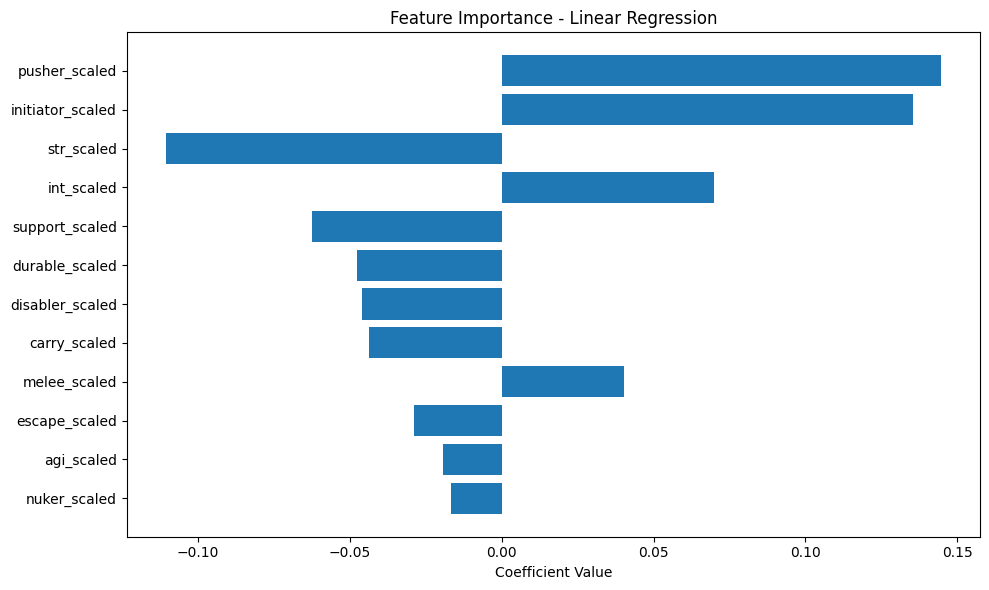

In [100]:
lr_model = LinearRegression()
lr_model.fit(X_train_num, y_train)
print_metrics_and_coeffs(lr_model, X_test_num, y_test, "Linear Regression")
plot_feature_importance(lr_model.coef_, feature_names_num, "Linear Regression")


Если учитывать, что таргет лежит на отрезке [-7.115, 6.316], то MSE и MAE лежит в приемлемом диапазоне ~5.5%. Проблема в малом R2 - фактически он объясняет только ~4% вариации данных. Это может говорить нам о том, что в целом не очень подобраны признаки (но при этом, я не очень понимаю как подобрать другие признаки, которые мы можем получить до начала игры, многое зависит от хода игры и в целом, если брать данные например о первых 10 минутах, то скорее всего можно была бы более линейная зависимость, которую можно было бы запредиктить) или, что скорее всего более вероятно, в данных есть нелинейные и более сложные зависимости и наша модель не может заметить.


Best Ridge Parameters: {'alpha': 100}

Ridge Regression Results:
MSE: 0.9725
MAE: 0.7315
R²: 0.0379
Coefficients: [ 0.03964181 -0.01911585  0.06900492 -0.10905056 -0.04335866 -0.04503207
 -0.04765177 -0.02846527  0.1337413  -0.01632905  0.14362989 -0.06222553]
Intercept: -1.8830391174655318e-06


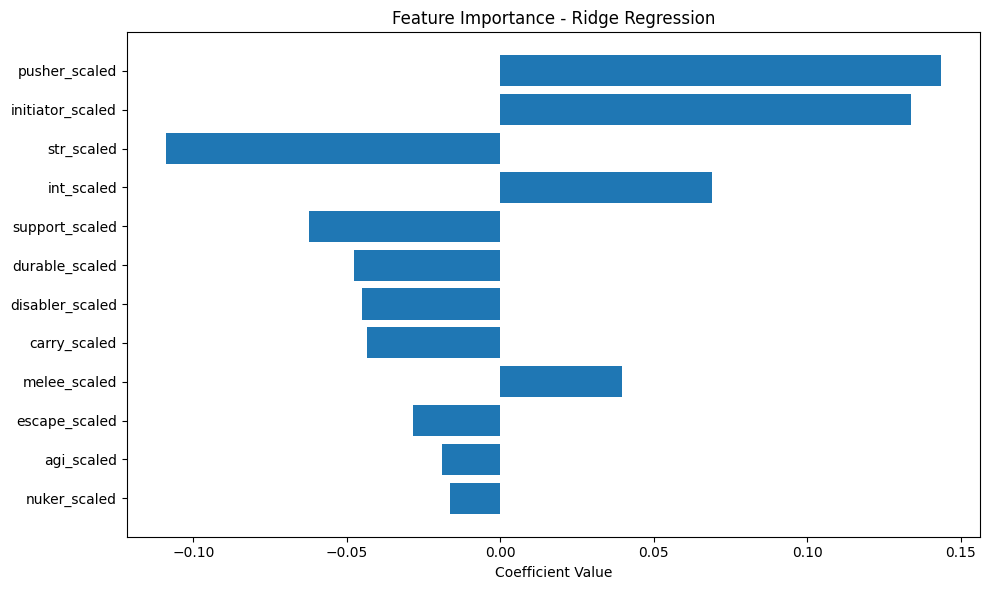

In [101]:
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_num, y_train)
best_ridge = ridge_grid.best_estimator_
print(f"\nBest Ridge Parameters: {ridge_grid.best_params_}")
print_metrics_and_coeffs(best_ridge, X_test_num, y_test, "Ridge Regression")
plot_feature_importance(best_ridge.coef_, feature_names_num, "Ridge Regression")

Можем увидеть ту же проблему


Best LASSO Parameters: {'alpha': 0.001}

LASSO Regression Results:
MSE: 0.9724
MAE: 0.7314
R²: 0.0380
Coefficients: [ 0.03812046 -0.01705554  0.06907219 -0.108115   -0.04242033 -0.04448241
 -0.04588301 -0.02638686  0.1342838  -0.01475015  0.14408526 -0.06099799]
Intercept: -1.0351918847847757e-05


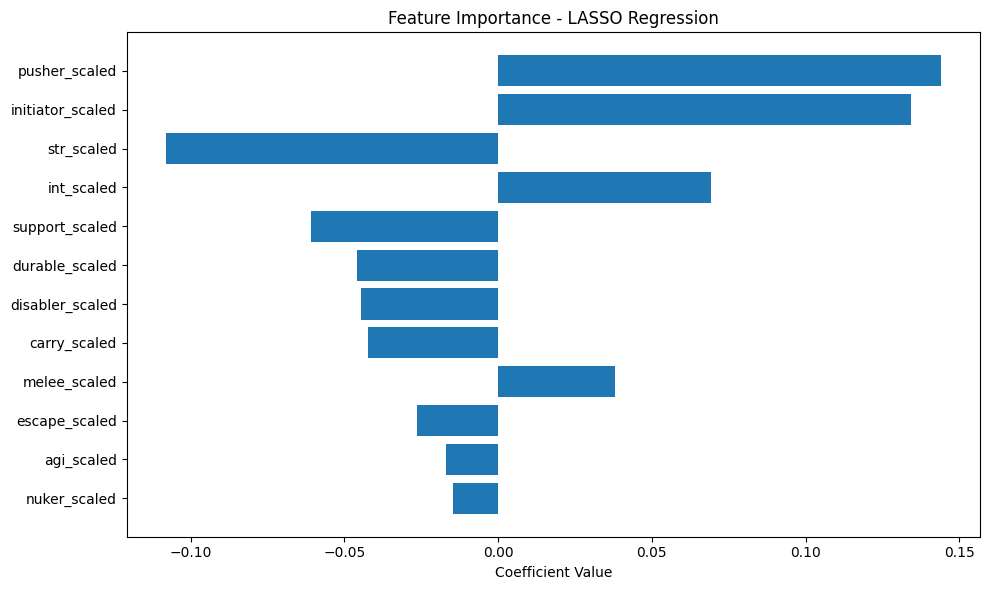

In [108]:
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_num, y_train)
best_lasso = lasso_grid.best_estimator_
print(f"\nBest LASSO Parameters: {lasso_grid.best_params_}")
print_metrics_and_coeffs(best_lasso, X_test_num, y_test, "LASSO Regression")
plot_feature_importance(best_lasso.coef_, feature_names_num, "LASSO Regression")

Можем увидеть ту же проблему


Best Elastic Net Parameters: {'alpha': 0.01, 'l1_ratio': 0.1}

Elastic Net Regression Results:
MSE: 0.9723
MAE: 0.7313
R²: 0.0381
Coefficients: [ 0.0374134  -0.01680138  0.06814336 -0.10628299 -0.04197758 -0.04340608
 -0.04603519 -0.02592454  0.13223845 -0.0144845   0.14279714 -0.06064367]
Intercept: -1.596683081868763e-05


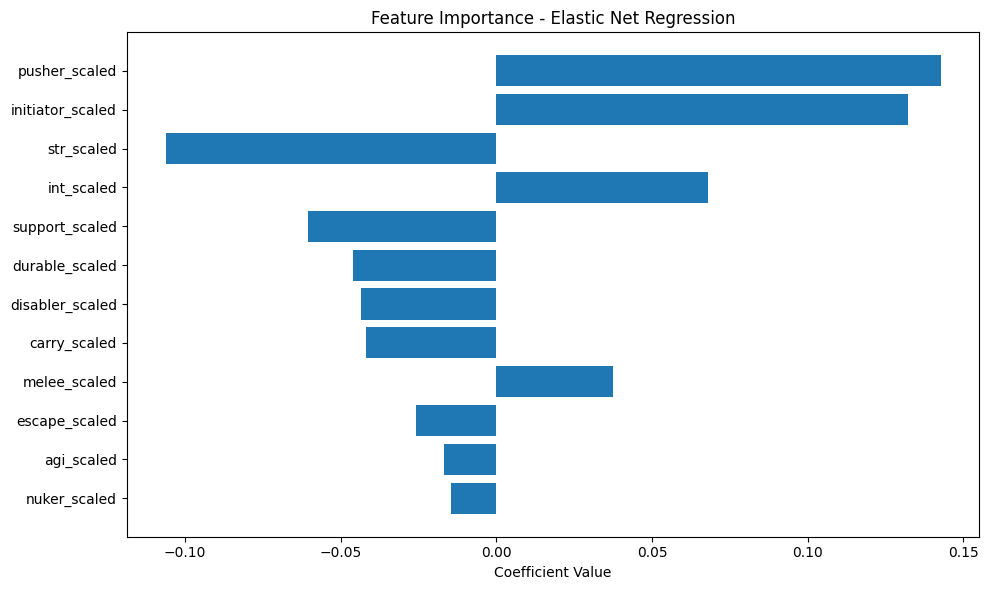

In [110]:
enet_params = {'alpha': [0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]}
enet_grid = GridSearchCV(ElasticNet(), enet_params, cv=5, scoring='neg_mean_squared_error')
enet_grid.fit(X_train_num, y_train)
best_enet = enet_grid.best_estimator_
print(f"\nBest Elastic Net Parameters: {enet_grid.best_params_}")
print_metrics_and_coeffs(best_enet, X_test_num, y_test, "Elastic Net Regression")
plot_feature_importance(best_enet.coef_, feature_names_num, "Elastic Net Regression")

Можем увидеть ту же проблему

In [111]:
best_models = {
    'LinearRegression': lr_model,
    'Ridge': best_ridge,
    'LASSO': best_lasso,
    'ElasticNet': best_enet
}

In [112]:
best_models

{'LinearRegression': LinearRegression(),
 'Ridge': Ridge(alpha=100),
 'LASSO': Lasso(alpha=0.001),
 'ElasticNet': ElasticNet(alpha=0.01, l1_ratio=0.1)}

# Задание 5 выполнялось в задании 2

# Задание 6

Обучить LinearRegression, лучшие модели Ridge, LASSO, Elastic Net на обучающем наборе с категориальными признаками.
<br>Вывести значения гиперпараметров, коэффициенты регрессии (model.coef_ и model.intercept_) и значения метрик на тестовом наборе (MSE, MAE и R2).
<br>Сравнить метрики с наличием категориальных признаков и без для каждой из моделей.
<br>Выбрать лучшую модель.
<br>Построить график (barh) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков <br>подписаны по вертикальной оси).
<br>Осуществить фильтрацию признаков с использованием Recursive Feature Elimination.
<br>Построить график (barh) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).
<br>Вывести значения метрик на тестовом наборе (MSE, MAE и R2).

In [113]:
def print_metrics_and_coeffs(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{model_name} Results:")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    return y_pred

def plot_feature_importance(coefs, feature_names, model_name):
    plt.figure(figsize=(10, 60))
    sorted_idx = np.argsort(np.abs(coefs))[::-1]  # Sort by absolute value, descending
    plt.barh(range(len(coefs)), coefs[sorted_idx], align='center')
    plt.yticks(range(len(coefs)), feature_names[sorted_idx])
    plt.xlabel('Coefficient Value')
    plt.title(f'Feature Importance - {model_name}')
    plt.gca().invert_yaxis()  # Top-down order
    plt.tight_layout()
    plt.show()
    plt.savefig(f'{model_name.lower().replace(" ", "_")}_feature_importance.png')
    plt.close()

In [114]:
feature_names = X_train.columns


Linear Regression Results:
MSE: 0.6807
MAE: 0.5956
R²: 0.3175
Coefficients: [-2.42751521e+11  1.49658721e+12 -1.83863520e+11 -1.84103762e+12
 -5.36596915e+11 -1.34707115e+12  7.68611621e+11  7.50779885e+11
 -4.60059622e+11 -5.87912839e+11  1.21050321e+11 -2.56895232e+11
  5.18048247e+11  4.92482980e+11  1.11956408e+12  4.30761943e+10
  5.14477365e+11  4.88912098e+11  4.74768388e+11  1.14691028e+12
 -4.60059622e+11  6.32698969e+11  1.77769821e+12 -5.40167797e+11
  1.06680211e+12  1.05265840e+12  2.23661946e+12  4.88912098e+11
 -5.36596915e+11  1.92505596e+12 -1.69672928e+12  1.11623334e+11
  6.18555258e+11  1.21050321e+11 -8.16296438e+11  2.07447722e+12
 -9.73084693e+11  1.37273122e+12  3.92734326e+11  9.19327212e+11
  2.78537332e+12 -1.84309762e+12  7.64923595e+11  6.22126140e+11
  1.86875768e+12  1.28312905e+12  1.06906610e+11  4.74768388e+11
 -1.19652099e+12 -9.73084693e+11 -5.54311508e+11  1.35858751e+12
  6.33220438e+11 -2.38034798e+11  1.85461397e+12  2.63952294e+12
  1.46959196e

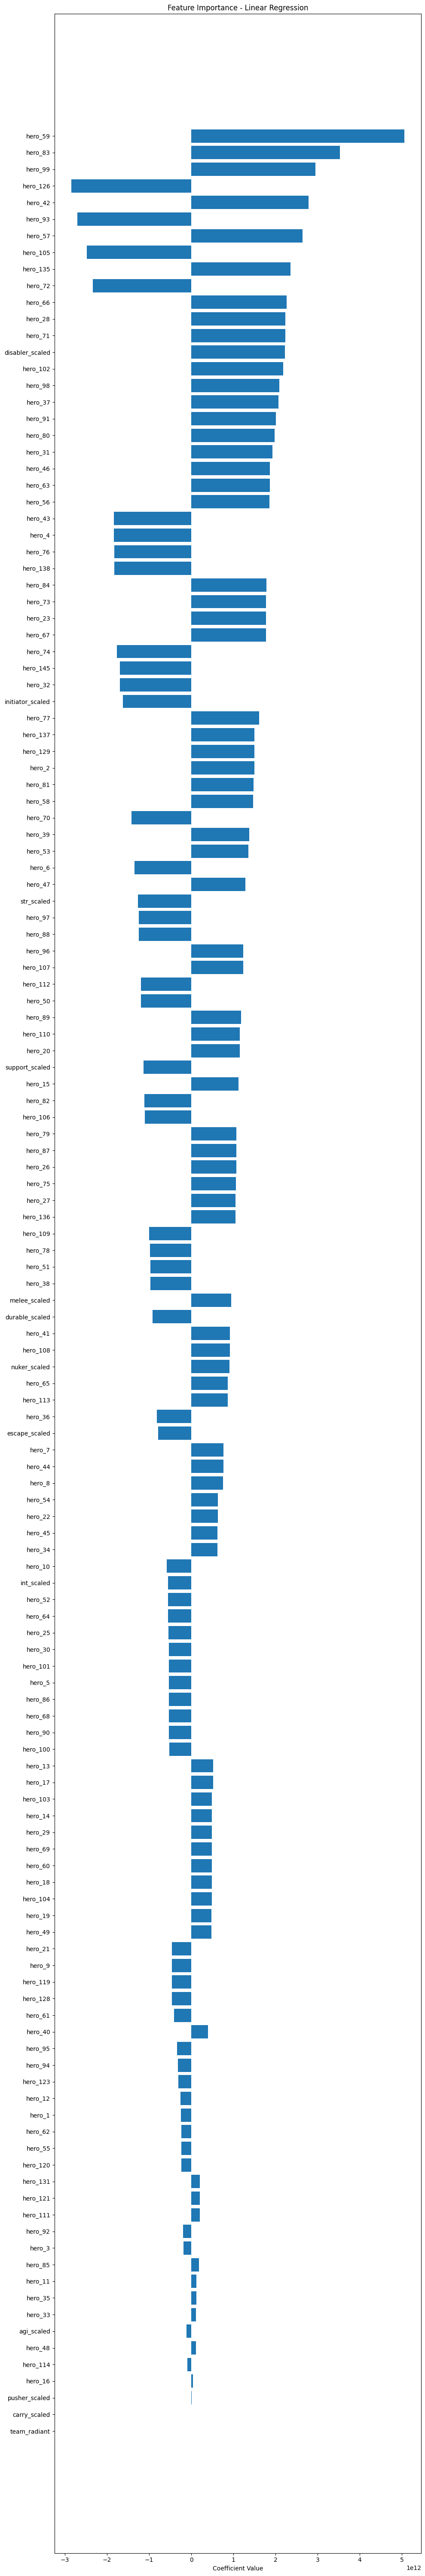

In [117]:
# плохо работает на тестовом, не понимаю почему best_ridge.alpha
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print_metrics_and_coeffs(lr_model, X_train, y_train, "Linear Regression")
plot_feature_importance(lr_model.coef_, feature_names, "Linear Regression")

В целом, точность увеличилась, но какая то проблема к коэффициентами


Best Ridge Parameters: {'alpha': 10}

Ridge Regression Results:
MSE: 0.7149
MAE: 0.6086
R²: 0.2928
Coefficients: [-2.96160004e-01 -9.73899596e-02  2.67766169e-01 -8.16025066e-03
  1.46535224e-01 -5.57841413e-01 -2.06973865e-01  1.26727678e-01
  3.72375592e-01  1.11466220e-01  1.88352956e-01 -4.87738356e-01
  1.41409942e-01 -9.52642595e-02 -3.28218074e-01 -2.99349415e-01
  1.59282890e-01 -4.34086302e-02 -1.06357011e-01 -2.51934011e-01
 -2.24388576e-01 -3.11261215e-01 -2.95104934e-02 -7.48326118e-02
 -3.85963949e-01  4.26384425e-02  1.79941643e-01  2.15502045e-01
 -4.09099284e-01 -4.13187073e-01  1.31858007e-01  7.45680572e-01
  1.39644581e-01 -1.11097136e-02  4.67787697e-04 -5.76779053e-02
 -8.41666956e-02 -7.29615092e-03 -1.03016953e-01  1.20063701e-01
 -2.02962530e-01 -2.66739788e-01 -1.83979333e-01 -6.91752617e-03
  3.37365494e-01 -8.24402290e-02  1.45001189e-01 -1.75174691e-01
 -5.59789651e-02 -1.48110031e-01  4.20691053e-01  3.08814747e-01
  1.83595096e-01  2.18021873e-01 -9.68693

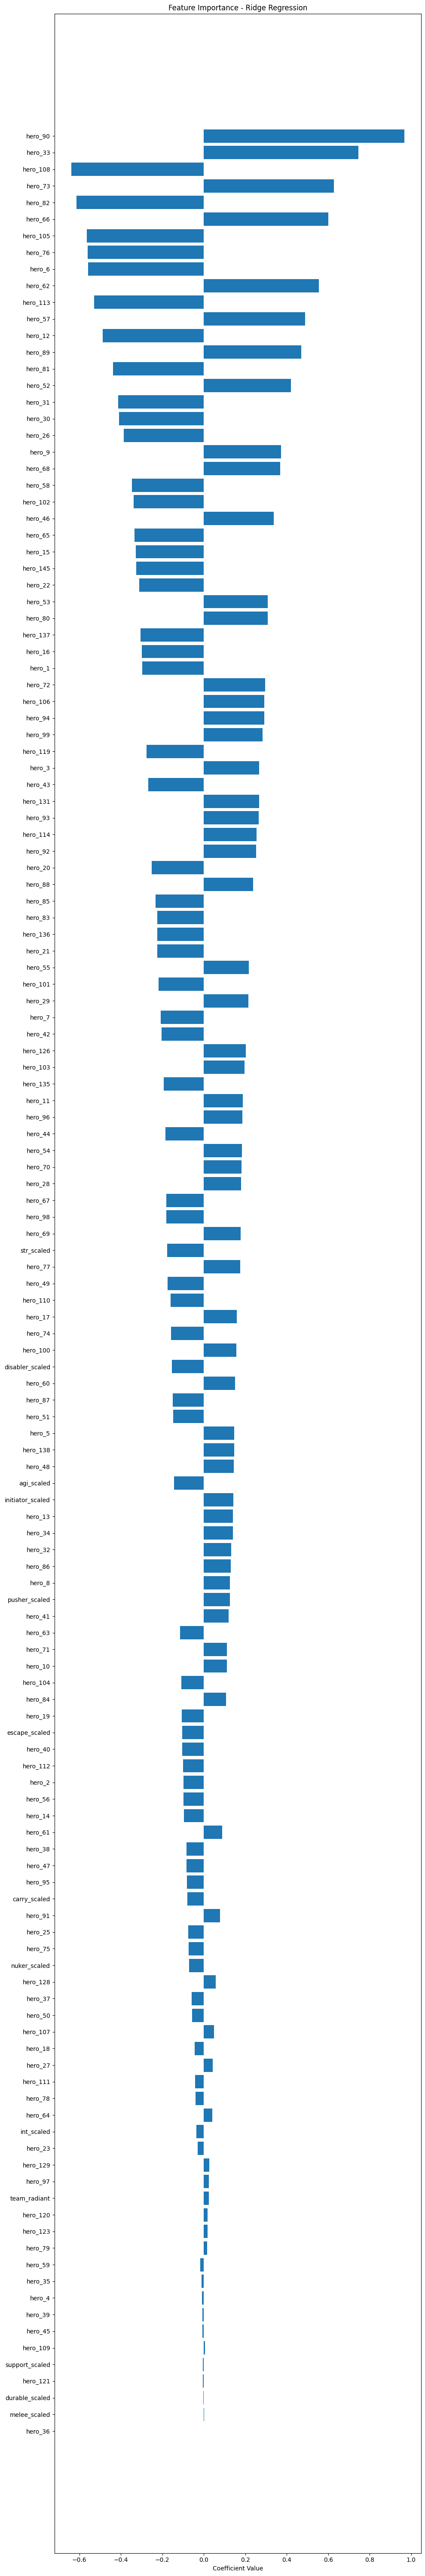

In [116]:
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
print(f"\nBest Ridge Parameters: {ridge_grid.best_params_}")
print_metrics_and_coeffs(best_ridge, X_test, y_test, "Ridge Regression")
plot_feature_importance(best_ridge.coef_, feature_names, "Ridge Regression")

Точность лучше, с коэффициентами все хорошо


Best LASSO Parameters: {'alpha': 0.001}

LASSO Regression Results:
MSE: 0.7189
MAE: 0.6101
R²: 0.2888
Coefficients: [-0.2581069  -0.09215745  0.35149342 -0.03946917  0.171794   -0.66729422
 -0.14971352  0.03108738  0.30715587 -0.          0.192024   -0.35605925
  0.02468928 -0.10127137 -0.23941628 -0.19757502  0.00109684 -0.06223663
 -0.20296327 -0.15510718 -0.23511923 -0.28592558  0.         -0.06484989
 -0.27851948  0.07279435  0.07071371  0.13962827 -0.32406441 -0.21372958
 -0.          0.73752866  0.07482247  0.         -0.          0.07309276
  0.         -0.03732907 -0.          0.05654477 -0.04483804 -0.38958724
 -0.16169521  0.          0.33266675 -0.          0.09198309 -0.26818303
  0.         -0.04734804  0.35353753  0.19706001  0.02669852  0.19214258
 -0.01803056  0.44921195 -0.19497573  0.08110691  0.07760009  0.
  0.54892823 -0.09085088  0.0186214  -0.32646486  0.78220953 -0.06625908
  0.38718712  0.09815198  0.16806667  0.          0.15620598  0.6793609
 -0.35955271 -0.

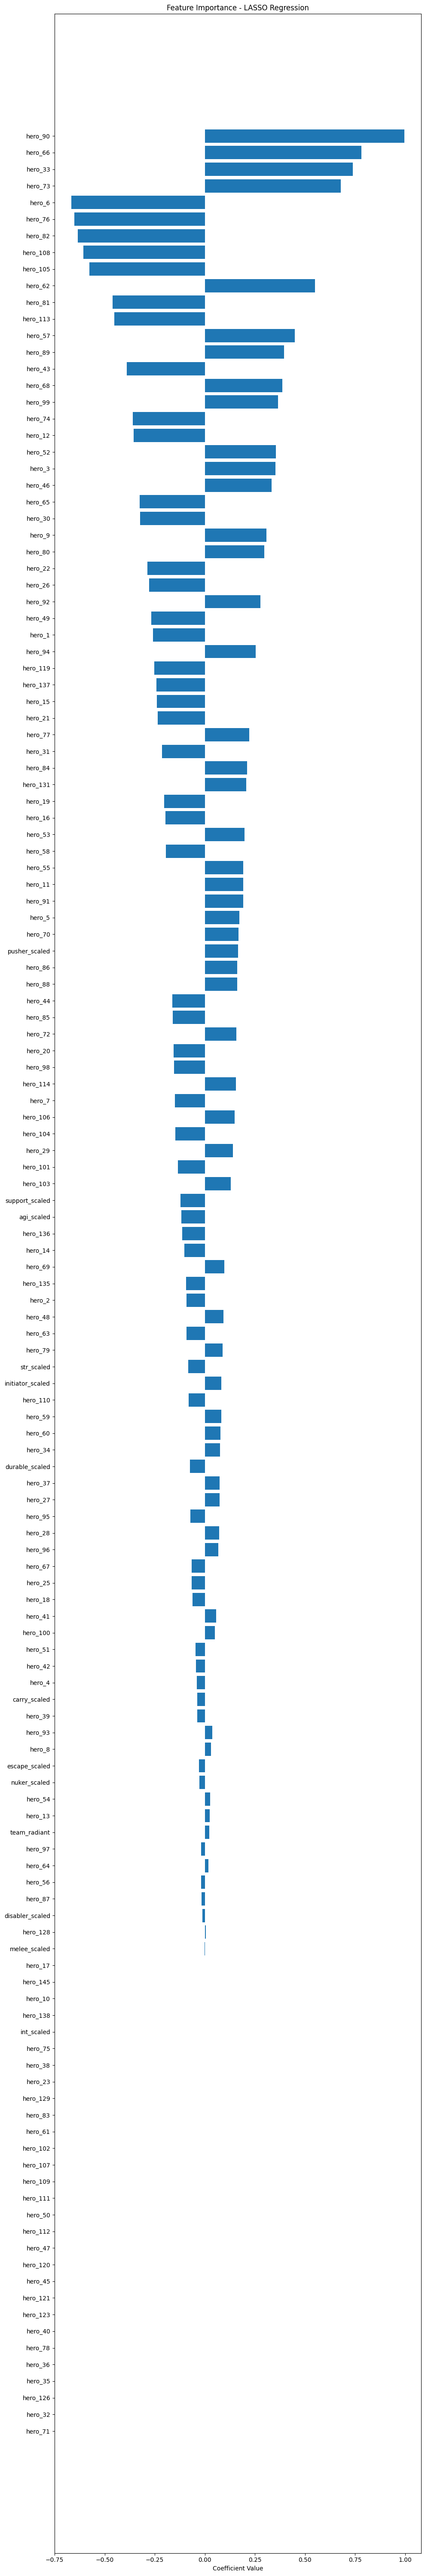

In [118]:
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
print(f"\nBest LASSO Parameters: {lasso_grid.best_params_}")
print_metrics_and_coeffs(best_lasso, X_test, y_test, "LASSO Regression")
plot_feature_importance(best_lasso.coef_, feature_names, "LASSO Regression")

Точность лучше чем в обычной линейной регрессии, с коэффициентами все хорошо


Best Elastic Net Parameters: {'alpha': 0.01, 'l1_ratio': 0.1}

Elastic Net Regression Results:
MSE: 0.7443
MAE: 0.6211
R²: 0.2636
Coefficients: [-1.53078808e-01 -7.12542268e-02  1.62504303e-01 -4.04947899e-02
  1.34134501e-01 -4.45259167e-01 -1.42816737e-01  2.62904170e-04
  2.36772588e-01  0.00000000e+00  1.28973822e-01 -8.83915993e-02
  4.13557756e-02 -8.06492515e-02 -2.07438617e-01 -1.94295029e-01
  4.82640374e-02 -1.82535913e-02 -1.13289078e-01 -1.61906464e-01
 -1.78774764e-01 -2.55714828e-01 -0.00000000e+00 -6.23567829e-02
 -3.10632420e-01  2.79526994e-02  7.14406394e-02  1.60678623e-01
 -2.24042174e-01 -2.87628224e-01  0.00000000e+00  5.42830552e-01
  7.38902464e-02 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -3.15340346e-03 -2.18046846e-02 -0.00000000e+00  0.00000000e+00
 -6.99191504e-02 -1.64069824e-01 -1.99713654e-01  0.00000000e+00
  2.54502444e-01 -8.59679753e-03  6.70368174e-02 -1.72843188e-01
  0.00000000e+00 -7.45823072e-02  3.09315946e-01  1.98905840e-01
  7.976042

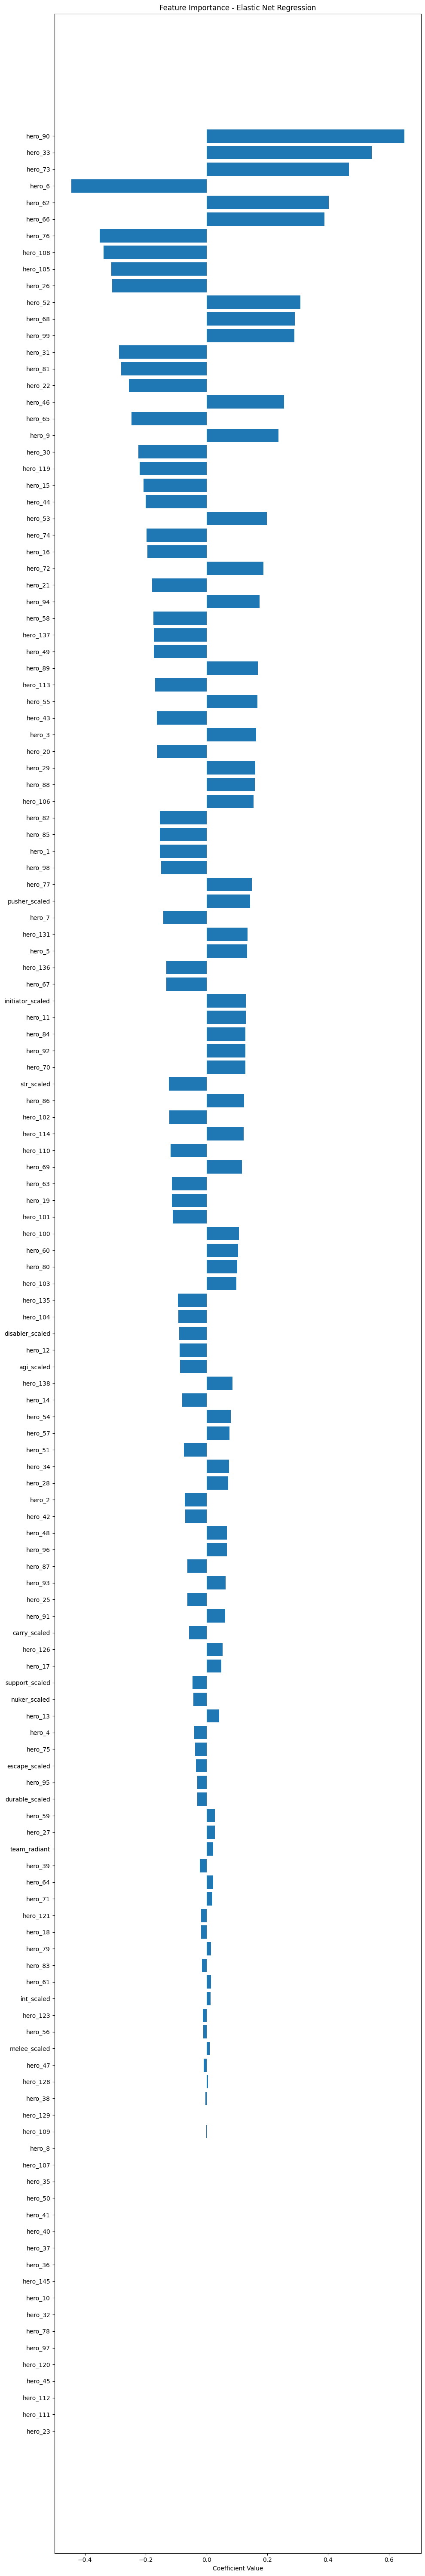

In [119]:
enet_params = {'alpha': [0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]}
enet_grid = GridSearchCV(ElasticNet(), enet_params, cv=5, scoring='neg_mean_squared_error')
enet_grid.fit(X_train, y_train)
best_enet = enet_grid.best_estimator_
print(f"\nBest Elastic Net Parameters: {enet_grid.best_params_}")
print_metrics_and_coeffs(best_enet, X_test, y_test, "Elastic Net Regression")
plot_feature_importance(best_enet.coef_, feature_names, "Elastic Net Regression")

In [123]:
def print_metrics_and_coeffs(model, X, y, model_name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"\n{model_name} Results:")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    #print(f"Coefficients: {model.coef_}")
    #print(f"Intercept: {model.intercept_}")
    
    return mse, mae, r2

In [124]:
lr_metrics = print_metrics_and_coeffs(lr_model, X_test, y_test, "Linear Regression")
ridge_metrics = print_metrics_and_coeffs(best_ridge, X_test, y_test, "Ridge Regression")
lasso_metrics = print_metrics_and_coeffs(best_lasso, X_test, y_test, "LASSO Regression")
enet_metrics = print_metrics_and_coeffs(best_enet, X_test, y_test, "Elastic Net Regression")


Linear Regression Results:
MSE: 0.7176
MAE: 0.6101
R²: 0.2900

Ridge Regression Results:
MSE: 0.7149
MAE: 0.6086
R²: 0.2928

LASSO Regression Results:
MSE: 0.7189
MAE: 0.6101
R²: 0.2888

Elastic Net Regression Results:
MSE: 0.7443
MAE: 0.6211
R²: 0.2636


Можно увидеть, что Ridge Regression отработала лучше всего

In [125]:
models = {
    'Linear Regression': (lr_model, lr_metrics[2]),
    'Ridge': (best_ridge, ridge_metrics[2]),
    'LASSO': (best_lasso, lasso_metrics[2]),
    'Elastic Net': (best_enet, enet_metrics[2])
}
best_model_name, (best_model, best_r2) = max(models.items(), key=lambda x: x[1][1])
print(f"\nBest model selected: {best_model_name} with R² = {best_r2:.4f}")

if best_model_name == 'Linear Regression':
    estimator = LinearRegression()
elif best_model_name == 'Ridge':
    estimator = Ridge(alpha=best_ridge.alpha)
elif best_model_name == 'LASSO':
    estimator = Lasso(alpha=best_lasso.alpha)
elif best_model_name == 'Elastic Net':
    estimator = ElasticNet(alpha=best_enet.alpha, l1_ratio=best_enet.l1_ratio)



Best model selected: Ridge with R² = 0.2928


In [129]:
selector = RFECV(estimator, cv=5, scoring='neg_mean_squared_error')
selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.support_]
print(f"Выбранные признаки: {list(selected_features)}")

Выбранные признаки: ['hero_1', 'hero_2', 'hero_3', 'hero_5', 'hero_6', 'hero_7', 'hero_8', 'hero_9', 'hero_10', 'hero_11', 'hero_12', 'hero_13', 'hero_14', 'hero_15', 'hero_16', 'hero_17', 'hero_19', 'hero_20', 'hero_21', 'hero_22', 'hero_25', 'hero_26', 'hero_28', 'hero_29', 'hero_30', 'hero_31', 'hero_32', 'hero_33', 'hero_34', 'hero_37', 'hero_38', 'hero_40', 'hero_41', 'hero_42', 'hero_43', 'hero_44', 'hero_46', 'hero_47', 'hero_48', 'hero_49', 'hero_51', 'hero_52', 'hero_53', 'hero_54', 'hero_55', 'hero_56', 'hero_57', 'hero_58', 'hero_60', 'hero_61', 'hero_62', 'hero_63', 'hero_65', 'hero_66', 'hero_67', 'hero_68', 'hero_69', 'hero_70', 'hero_71', 'hero_72', 'hero_73', 'hero_74', 'hero_75', 'hero_76', 'hero_77', 'hero_80', 'hero_81', 'hero_82', 'hero_83', 'hero_84', 'hero_85', 'hero_86', 'hero_87', 'hero_88', 'hero_89', 'hero_90', 'hero_91', 'hero_92', 'hero_93', 'hero_94', 'hero_95', 'hero_96', 'hero_98', 'hero_99', 'hero_100', 'hero_101', 'hero_102', 'hero_103', 'hero_104', 'he


Ridge Results:
MSE: 0.7156
MAE: 0.6087
R²: 0.2921


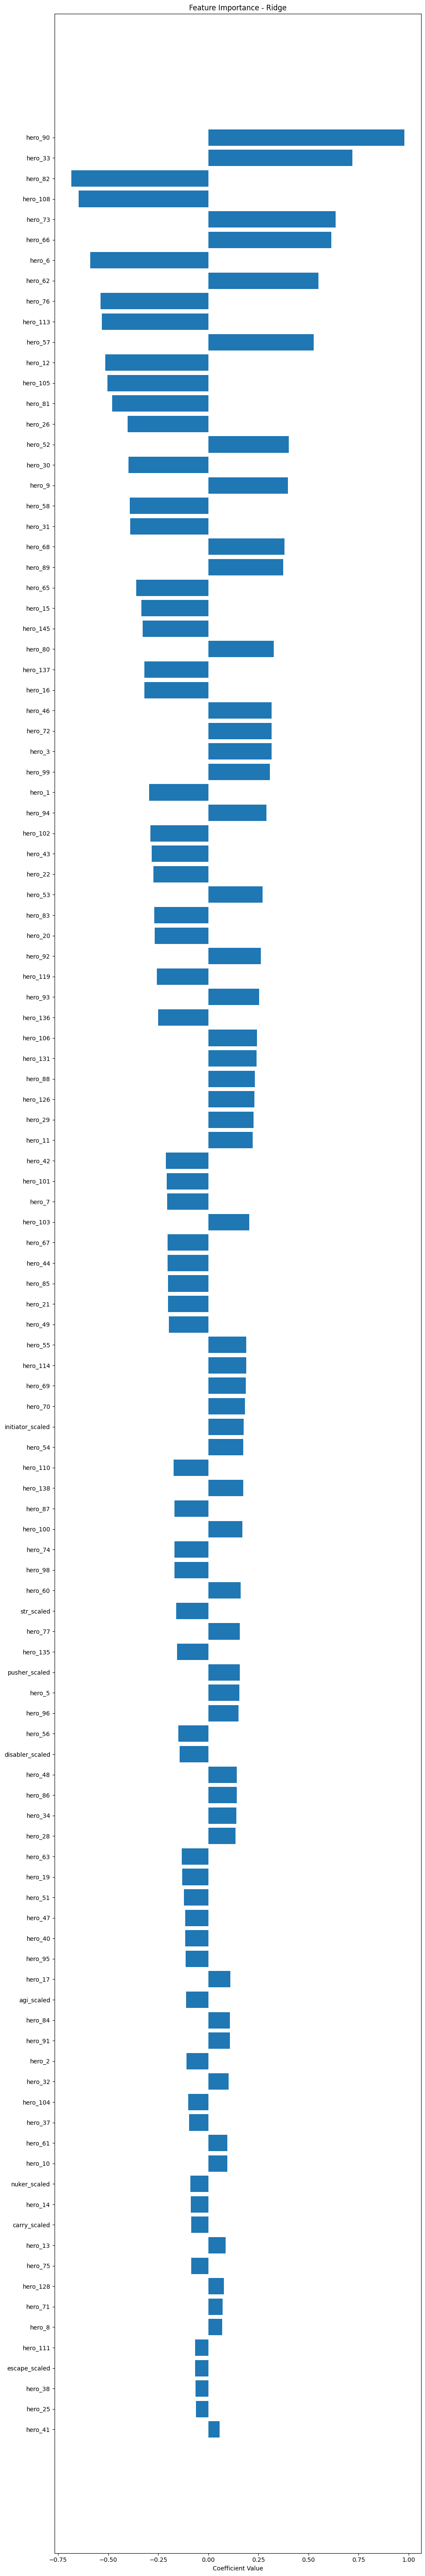

In [130]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
best_model.fit(X_train_selected, y_train)

print_metrics_and_coeffs(best_model, X_test_selected, y_test, best_model_name)


plot_feature_importance(best_model.coef_, selected_features, best_model_name)

В целом можем увидеть, что уменьшив количество признаков, модель почти не потеряла точность

# Задание 7

| Regression Method       | MSE    | MAE    | R²     |
|-------------------------|--------|--------|--------|
| Elastic Net Regression  | 0.9723 | 0.7313 | 0.0381 |
| LASSO Regression        | 0.9724 | 0.7314 | 0.0380 |
| Ridge Regression        | 0.9725 | 0.7315 | 0.0379 |
| Linear Regression       | 0.9726 | 0.7315 | 0.0378 |
| Linear Regression categories       | 0.7176 | 0.6101 | 0.2900 |
| Ridge Regression categories       | 0.7149 | 0.6086 | 0.2928 |
| LASSO Regression categories       | 0.7189 | 0.6101 | 0.2888 |
| Elastic Net Regression categories | 0.7443 | 0.6211 | 0.2636 |

Из таблицы можем увидеть, что Elastic Net отработал "лучше" для безкатегориальных данных, но при этом в целом все модели отработали плохо на безкатегориальных данных. Для данных с категориями Ridge Regression отработал лучше всех остальных моделей. В целом мы можем увидеть повышение как точности так и объяснимости зависимости данных.